<a href="https://colab.research.google.com/github/ncat-morrow/isen-project-1-statistic-soliders/blob/main/ISEN_370_Module_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISEN 370 Project 2 Assignment
In this assignment, you will use data science tools to exlore two datasets, calculate confidence intervals and conduct a hypothesis testing on the given datasets.
You can use ISEN 370 Project 2 Demo file as a reference when completing this assignment.


First, you will need to import required libraries to the project.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Data Import

The Learning Enhanced Watershed Assessment System (LEWAS) is a unique real-time water and weather monitoring system. The LEWAS monitoring site is installed at the outfall of the Webb Branch watershed on Virginia Tech’s campus. Webb Branch is an urban stream with a 2.78 square kilometer (about one square mile) watershed consisting of residential and commercial properties. The stream is routed through man-made channels and culverts until it discharges at the LEWAS monitoring site. We first import the LEWAS datasets and print the first 10 rows of data. The data is stored in CSV files for which the path is given in the cell below. There are two CSV files, the first contains data from 9/01/17-9/30/17 and the second contains data from 10/01/17-10/31/17.
The following codes provide the link to where the data are stored.

In [79]:
data_url3='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_3.csv'
data_url4='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_4.csv'
df3 = pd.read_csv(data_url3)
df4 = pd.read_csv(data_url4)

## Exploring Data

* Display the first 10 rows of data ufor each of the two data sets mentioned above.

In [80]:
print("df3 rows:", len(df3), "df4 rows:", len(df4))
display(df3.head(10))
display(df4.head(10))
df3.info()
df4.info()

df3 rows: 14138 df4 rows: 14158


,Date and Time,Water Temperature (F),Est. Flow Rate[m^3/s]
0,9/1/17 12:01 AM,66.236,0.051211
1,9/1/17 12:04 AM,66.236,0.042161
2,9/1/17 12:07 AM,66.146,0.029130
3,9/1/17 12:10 AM,66.200,0.029003
4,9/1/17 12:13 AM,66.236,0.023817
5,9/1/17 12:16 AM,66.254,0.013823
6,9/1/17 12:19 AM,66.272,0.010061
7,9/1/17 12:22 AM,66.290,0.008013
8,9/1/17 12:25 AM,66.254,0.004908
9,9/1/17 12:28 AM,66.290,0.005631


,Date and Time,Water Temperature (F),Estimated Flow Rate (m3/s)
0,10/1/2017 0:19,62.096,0.029084
1,10/1/2017 0:30,61.916,0.032962
2,10/1/2017 0:36,61.862,0.026500
3,10/1/2017 13:25,60.512,0.018774
4,10/1/2017 13:35,60.494,0.016194
5,10/1/2017 13:48,60.566,0.013135
6,10/1/2017 14:33,60.836,0.014517
7,10/1/2017 16:40,62.114,0.011127
8,10/1/2017 17:32,62.204,0.006843
9,10/1/2017 17:46,62.150,0.004584


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14138 entries, 0 to 14137
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date and Time          14138 non-null  object 
 1   Water Temperature (F)  14138 non-null  float64
 2   Est. Flow Rate[m^3/s]  14138 non-null  float64
dtypes: float64(2), object(1)
memory usage: 331.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14158 entries, 0 to 14157
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date and Time               14158 non-null  object 
 1   Water Temperature (F)       14158 non-null  float64
 2   Estimated Flow Rate (m3/s)  14158 non-null  float64
dtypes: float64(2), object(1)
memory usage: 332.0+ KB


## Exploring Data
Generate **two** scatter plots: one for the estimated flow rate data in September 2017 and the other for the estimated flow rate data in October 2017. Make sure to provide the title, x axis label and y axis label for your scatter plots.

## Scatter Plot 1

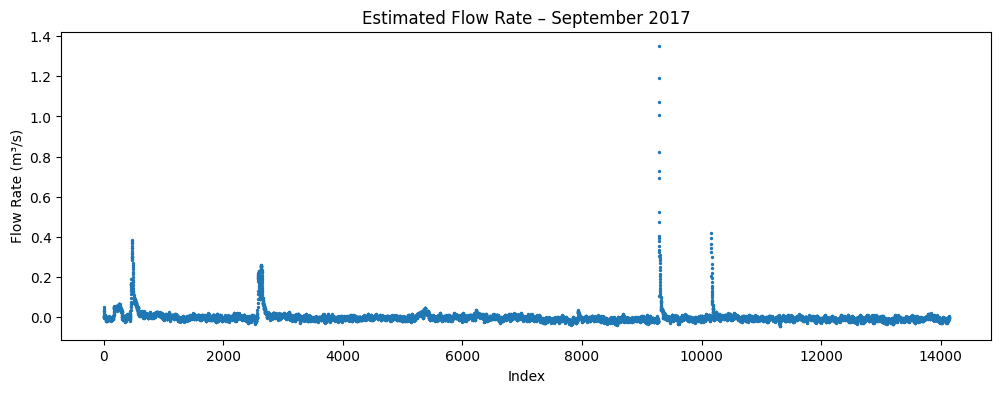

In [81]:
plt.figure(figsize=(12, 4))
plt.scatter(df3.index, df3['Est. Flow Rate[m^3/s]'], s=2)
plt.title('Estimated Flow Rate – September 2017')
plt.xlabel('Index')
plt.ylabel('Flow Rate (m³/s)')
plt.show()

Comment on the trend of Est. Flow Rate[m^3/s] for September 2017.
<br>
Answer: (Double click here to add your comments)
<BR>

## Scatter Plot 2

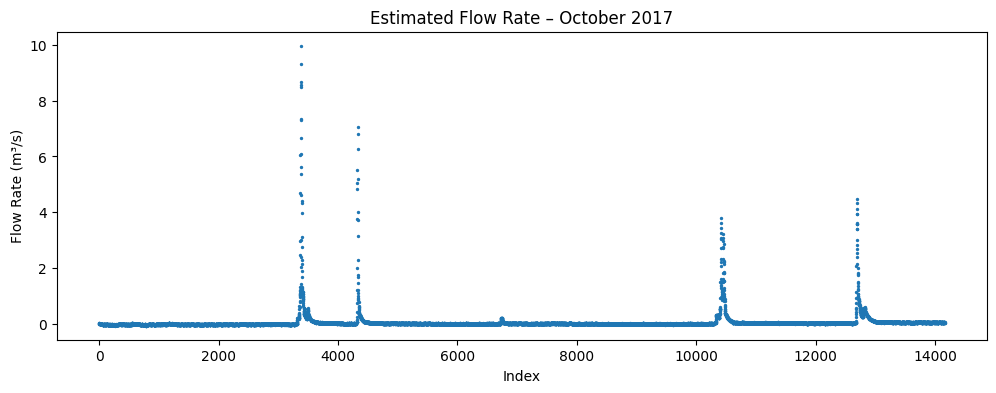

In [82]:
plt.figure(figsize=(12, 4))
plt.scatter(df4.index, df4['Estimated Flow Rate (m3/s)'], s=2)
plt.title('Estimated Flow Rate – October 2017')
plt.xlabel('Index')
plt.ylabel('Flow Rate (m³/s)')
plt.show()

Comment on the trend of Est. Flow Rate[m^3/s] for October 2017.
<br>
**Answer:**
<BR>


## Histogram Plotting
Plot a histogram for Est. Flow Rate  data of September 2017. Be sure to include proper titles and axis labels on each of your plots.<br>
Plot a histogram for Est. Flow Rate data of October 2017. Be sure to include proper titles and axis labels on each of your plots.

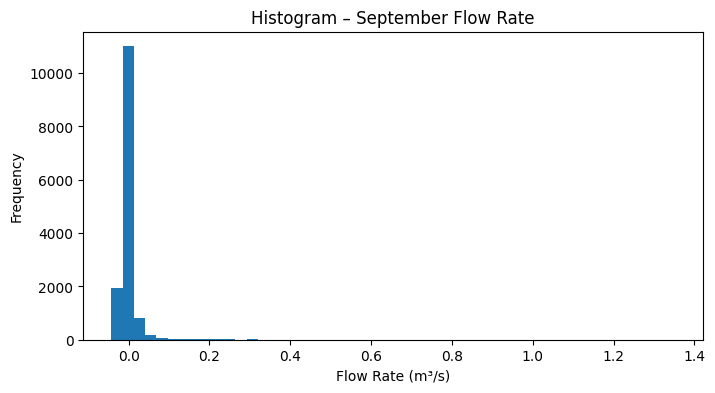

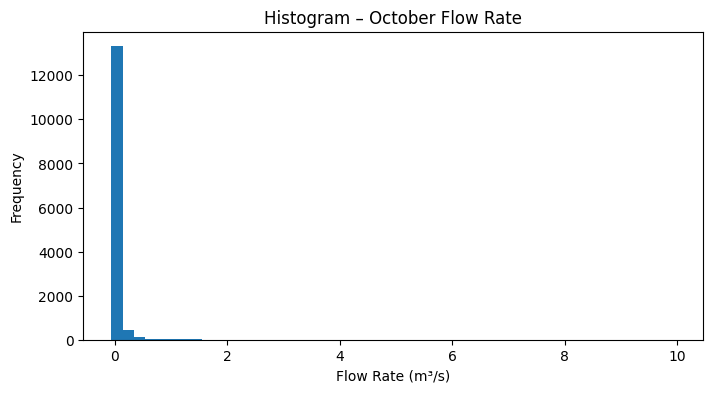

In [83]:
plt.figure(figsize=(8, 4))
plt.hist(df3['Est. Flow Rate[m^3/s]'], bins=50)
plt.title('Histogram – September Flow Rate')
plt.xlabel('Flow Rate (m³/s)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(df4['Estimated Flow Rate (m3/s)'], bins=50) # Corrected column name for df4
plt.title('Histogram – October Flow Rate')
plt.xlabel('Flow Rate (m³/s)')
plt.ylabel('Frequency')
plt.show()

***Comment on the shape of both distributions.***
<br>
***Answer:***
<br> (double click here to enter your comments)
<br>

# Boxplot

Generate a boxplot for Est. Flow Rate data of September 2017.<br>
*Generate* a boxplot for Est. Flow Rate data of October 2017.

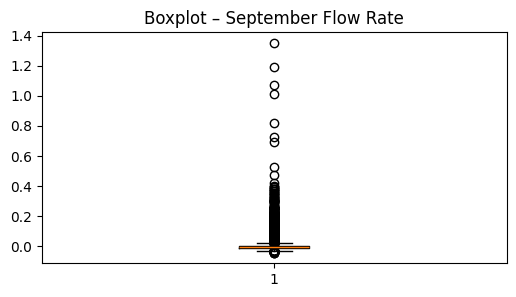

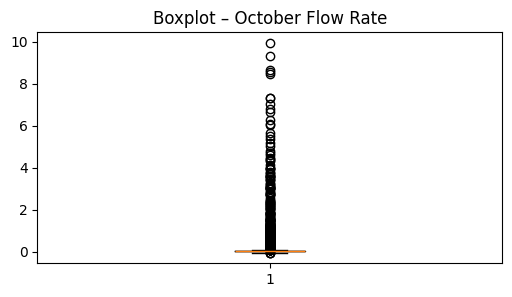

In [84]:
plt.figure(figsize=(6, 3))
plt.boxplot(df3['Est. Flow Rate[m^3/s]'].dropna())
plt.title('Boxplot – September Flow Rate')
plt.show()

plt.figure(figsize=(6, 3))
plt.boxplot(df4['Estimated Flow Rate (m3/s)'].dropna())
plt.title('Boxplot – October Flow Rate')
plt.show()

***Comment on both boxplots***
<br>
***Answer:*** <br>


#Confidence Interval

Generate the 95% confidence interval for the mean estimated flow rate of Septemebr 2017.


In [85]:
x = df3['Est. Flow Rate[m^3/s]'].dropna()
mean = np.mean(x)
se = stats.sem(x, nan_policy='omit')
ci_lower, ci_upper = stats.t.interval(0.95, df=len(x)-1, loc=mean, scale=se)
print("September mean flow =", mean)
print("95% confidence interval =", (ci_lower, ci_upper))



September mean flow = 7.631841739991872e-06
95% confidence interval = (np.float64(-0.0005891216373351925), np.float64(0.0006043853208151762))


Interpret the confidence interval you generated.<br>
***Answer:***

# Hypothesis testing
Suppose we are interested in testing if the mean estimated flow rate from September 2017 is statisticlly different from the mean estimated flow rate from October 2017.

***Question***<br>
How many samples are there in this experiment? What are they?<br>
***Answer***


# Independent Variable and Dependent Variable

***Question***<br>
What is the independent variable and what is the dependent variable of this experiment?

***Answer***

***Question***<br>
What are the assumptions for the two sample t test?

***Answer***



```
# This is formatted as code
```

#Hypothesis testing
Use the appropraite statistical analysis technique.<br>
Conduct model adequacy and comment on the model adequacy.<br>
Conduct hypothesis testing

In [86]:
samp3 = df3['Est. Flow Rate[m^3/s]'].dropna()
samp4 = df4['Estimated Flow Rate (m3/s)'].dropna()

samp3_sub = samp3.sample(5000) if len(samp3) > 5000 else samp3
samp4_sub = samp4.sample(5000) if len(samp4) > 5000 else samp4

sh3 = stats.shapiro(samp3_sub)
sh4 = stats.shapiro(samp4_sub)
lev = stats.levene(samp3, samp4)


print("Shapiro (Sep) W, p:", sh3)
print("Shapiro (Oct) W, p:", sh4)
print("Levene (stat, p):", lev)

Shapiro (Sep) W, p: ShapiroResult(statistic=np.float64(0.2552690253842972), pvalue=np.float64(5.324077116962736e-89))
Shapiro (Oct) W, p: ShapiroResult(statistic=np.float64(0.155006263870773), pvalue=np.float64(6.628601282273355e-92))
Levene (stat, p): LeveneResult(statistic=np.float64(319.0139543400415), pvalue=np.float64(5.830822745630015e-71))


Based on the tests, what can you conclude about the model assumptions?
<br>
**Answer:**

In [87]:
samp3 = df3['Est. Flow Rate[m^3/s]'].dropna()
samp4 = df4['Estimated Flow Rate (m3/s)'].dropna()

samp3_sub = samp3.sample(5000) if len(samp3) > 5000 else samp3
samp4_sub = samp4.sample(5000) if len(samp4) > 5000 else samp4

mw = stats.mannwhitneyu(samp3, samp4, alternative='two-sided')
print("Mann-Whitney U (stat, p):", mw)

Mann-Whitney U (stat, p): MannwhitneyuResult(statistic=np.float64(40097230.0), pvalue=np.float64(0.0))


# 6-Step Hypothesis Testing

1.

2.

3.

4.

5.

6.

In the spalce below, type your experience with your colab project experience. What you like, what you dislike and what you would like to experience in the future colab projects.
